In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from random import shuffle
import random


def divup(a, b):
    return (a + b - 1) / b

def imshow_bgr(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

In [4]:
def gaus_blur(img, sigma=5, r=25):
    return cv2.GaussianBlur(img, (r, r), sigma)

def motion_blur(img, x=3, y=3, reverse=False):
    box = np.zeros((y, x), np.float32)
    cv2.line(box, (0, 0), (x, y), 1, 3)
    box /= np.sum(box)
    if reverse:
        box = np.fliplr(box)
    img = cv2.filter2D(img, cv2.CV_32F, box)
    return img.astype(np.uint8)

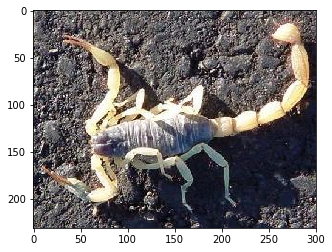

In [5]:
img = cv2.imread("blur_detection/caltech101/scorpion/image_0004.jpg")
imshow_bgr(img)

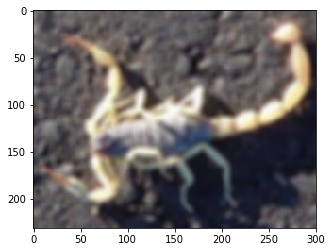

In [6]:
img_g = gaus_blur(img, 3, 9)
imshow_bgr(img_g)

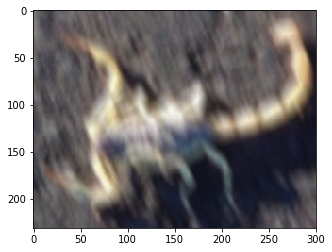

In [7]:
img_m = motion_blur(img, 10, 20)
imshow_bgr(img_m)

In [8]:
sobel_3x = cv2.Sobel(img, cv2.CV_32F, 2, 1, ksize=3)
sobel_5x = cv2.Sobel(img, cv2.CV_32F, 4, 1, ksize=5)
sobel_3y = cv2.Sobel(img, cv2.CV_32F, 1, 2, ksize=3)
sobel_5y = cv2.Sobel(img, cv2.CV_32F, 1, 4, ksize=5)

print(np.sum(sobel_3x), np.var(sobel_3x))
print(np.sum(sobel_3y), np.var(sobel_3y))
print(np.sum(sobel_5x), np.var(sobel_5x))
print(np.sum(sobel_5y), np.var(sobel_5y))

-218.0 9212.725
782.0 8792.412
3687.0 593362.06
-9249.0 550945.3


In [9]:
sobel_3x = cv2.Sobel(img_g, cv2.CV_32F, 2, 1, ksize=3)
sobel_5x = cv2.Sobel(img_g, cv2.CV_32F, 4, 1, ksize=5)
sobel_3y = cv2.Sobel(img_g, cv2.CV_32F, 1, 2, ksize=3)
sobel_5y = cv2.Sobel(img_g, cv2.CV_32F, 1, 4, ksize=5)

print(np.sum(sobel_3x), np.var(sobel_3x))
print(np.sum(sobel_3y), np.var(sobel_3y))
print(np.sum(sobel_5x), np.var(sobel_5x))
print(np.sum(sobel_5y), np.var(sobel_5y))

5.0 2.0266523
-9.0 1.9905195
182.0 111.72309
164.0 103.57436


In [10]:
sobel_3x = cv2.Sobel(img_m, cv2.CV_32F, 2, 1, ksize=3)
sobel_5x = cv2.Sobel(img_m, cv2.CV_32F, 4, 1, ksize=5)
sobel_3y = cv2.Sobel(img_m, cv2.CV_32F, 1, 2, ksize=3)
sobel_5y = cv2.Sobel(img_m, cv2.CV_32F, 1, 4, ksize=5)

print(np.sum(sobel_3x), np.var(sobel_3x))
print(np.sum(sobel_3y), np.var(sobel_3y))
print(np.sum(sobel_5x), np.var(sobel_5x))
print(np.sum(sobel_5y), np.var(sobel_5y))

-7.0 17.638147
21.0 8.529865
226.0 1108.4434
-248.0 543.0304


In [11]:
sm_g_diff = cv2.absdiff(img_g, gaus_blur(img_g, 3, 9))
print(np.sum(sm_g_diff), np.var(sm_g_diff))

sm_m_diff = cv2.absdiff(img_m, gaus_blur(img_m, 3, 9))
print(np.sum(sm_m_diff), np.var(sm_m_diff))

nsm_diff = cv2.absdiff(img, gaus_blur(img, 3, 9))
print(np.sum(nsm_diff), np.var(nsm_diff))

sm_g_diff = cv2.absdiff(img_g, gaus_blur(img_g, 5, 15))
print(np.sum(sm_g_diff), np.var(sm_g_diff))

sm_m_diff = cv2.absdiff(img_m, gaus_blur(img_m, 5, 15))
print(np.sum(sm_m_diff), np.var(sm_m_diff))

nsm_diff = cv2.absdiff(img, gaus_blur(img, 5, 15))
print(np.sum(nsm_diff), np.var(nsm_diff))

937422 18.10705215919242
760451 11.60457859011101
5506909 622.8376735915233
1831377 67.85675427101359
1338624 37.0678788578425
6348317 712.9234148537993


In [23]:
print(np.var(img))
print(np.var(img_g))
print(np.var(img_m))

4435.179546352806
2648.070111393233
2246.6043547423437
